<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/7_lab_anal_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("devtools")
library(devtools)
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("graph")


In [16]:
BiocManager::install("bio3d")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'bio3d'

Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  'stringr', 'testthat', 'tidyverse', 'tinytex', 'vctrs', 'viridisLite',
  'vroom', 'waldo', 'whisker', 'xfun', 'xml2', 'zip', 'boot', 'class',
  'foreign', 'KernSmooth', 'MASS', 'nnet'



In [18]:
library("bio3d")

# Biological Lab Data Analayis  with R


## BEER'S law


In a typical undergraduate biochemistry laboratory the experiment one performs is Beer's law. The Beer's law is expressible by a simple equation:
\begin{equation}
A=\epsilon\cdot c\cdot l
\label{eq:beer}
\end{equation}
where, A is molar absorbance, c is is the concentration of the chromophore in (M) and l is the path length in cm.As absorbance A is dimensionless the unit of $\epsilon$ is $M^{-1}cm^{-1}$.

# The molar extinction coefficient of malachite green 
Reported molar extinction coefficient match the value of 148,900cm-1/M at 616.5nm $\pm 4nm$ (Green, 1990). Now let us see what happens in a typical lab experiment. 

#  Reading of a spectrophotometer

In [2]:
dspec<-read.csv("https://raw.githubusercontent.com/adgcal/wetlabdata/main/mal.csv")

colnames(dspec)<-c('Molar.Concentration','Absorbance')
# lambda max =619nm

# Fitting the data using lm package 


In [3]:
fit<-lm(Absorbance~Molar.Concentration,data=dspec)
coeff=coefficients(fit)
names(coeff)<-NULL
eq = paste0("MolarExt.Coeff= ", signif(coeff[2],6))

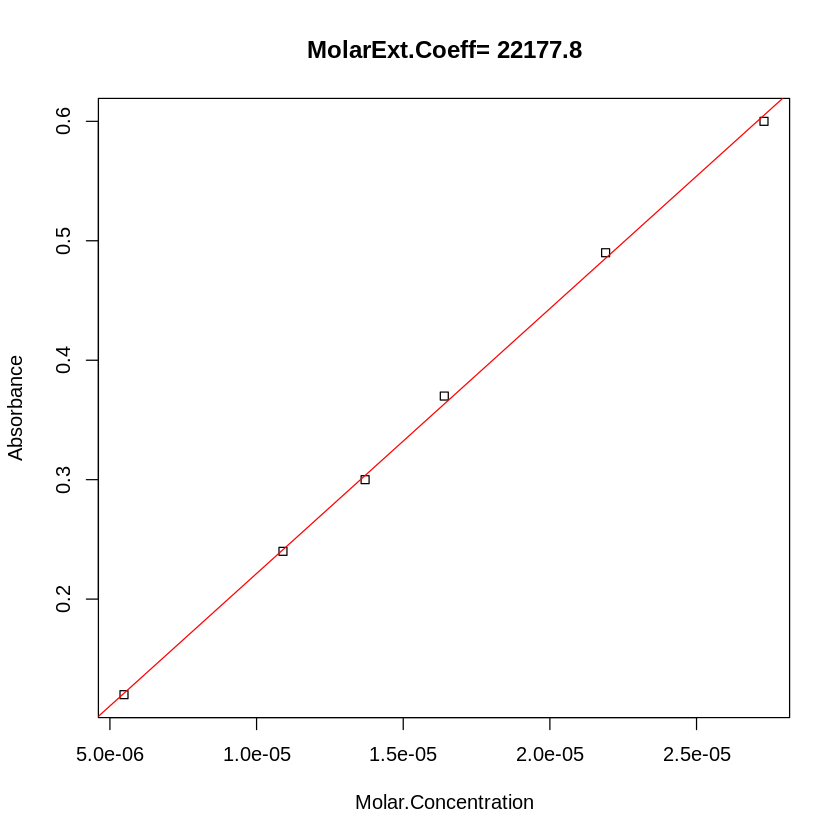

In [4]:
plot(dspec,main=eq,pch=22)
abline(fit,col="red")

# Find the concentration of the chromophore from its absorbance 


In [5]:
findconc<-function(absorb,fit){
  slope<-fit$coefficients[2]
  intercept<-fit$coefficients[1]
  conc<-(absorb-intercept)/slope 
  return(conc)}

# Finding Concentration 


## Case 1

In [6]:
findconc(0.2,fit)


(Intercept) 
9.032859e-06

## Case 2


In [7]:
findconc(0.3,fit)



(Intercept) 
1.354186e-05

# Theoretical prediction of the extinction coefficient of a protein (@pace1995measure)

## Get the sequence using bio3d
- Count the number of tryptophans, tyrosines and cystines (cysteine residues in disulfide bonds - not reduced residues)
- For 6 M Guanidine Hydrochloride, use the formula E280 = (No. of tryptophan residues)*(5,685) + (No. of tyrosine residues)*(1,285) + (No. of cystines)*(125)
- For water, use the formula E280 = (No. of tryptophan residues)*(5,500) + (No. of tyrosine residues)*(1,490) + (No. of cystines)*(125)
- For 8 M Urea, use the formula E280 = (No. of tryptophan residues)*(5,630) + (No. of tyrosine residues)*(1,300) + (No. of cystines)*(115)

# How to browse for a protein structure 
\small 
- Step 1 go to <https://www.rcsb.org/>
- In the key word serach name a protein 
- Suppose we supply the key 'human ferritin'
- We obtain a PDB ID 1RO3
- 3D structure can be visualized (<https://www.rcsb.org/3d-view/1R03>)

In [19]:
extin.coeff<-function(pdbid){
  x<-read.pdb(pdbid)
  y<-pdbseq(x)
  n.trp<-length(which(y=='W'))
  if(is.na(n.trp)) n.trp=0
  n.tyr<-length(which(y=='Y'))
    if(is.na(n.tyr)) n.tyr=0
  n.cys<-length(which(y=='C'))
    if(is.na(n.cys)) n.cys=0
  return(n.trp*5500+n.tyr*1490+n.cys*125)
}

# The prediction of extinction coefficient of lysozyme from its PDB ID

## Compare with sigma data 
<https://www.sigmaaldrich.com/content/dam/sigma-aldrich/docs/Sigma/Datasheet/7/l6876dat.pdf>

In [20]:
eps.lys<-extin.coeff('6LYZ')# hen egg lysozyme
sigma.lys=26.4*14307/10
cat("From Sigma Catalogue",sigma.lys,"Evaluated",eps.lys)

  Note: Accessing on-line PDB file
From Sigma Catalogue 37770.48 Evaluated 38470

# The prediction of extinction coefficient of ferritin from its PDB ID


In [21]:
eps.ferritin<-extin.coeff('1RO3')
cat('Predicted Ferritin Extinction Coefficient',eps.ferritin)

  Note: Accessing on-line PDB file
Predicted Ferritin Extinction Coefficient 2490

# Comparison of extinction coefficients of Ferritin and Lysozyme 


In [22]:
df<-c(eps.ferritin,eps.lys)
df<-matrix(df,ncol=2)
df<-data.frame(df)
colnames(df)<-c('Ferritin','Lysozyme')
row.names(df)<-'Molar extinction Coefficient'
knitr::kable(df)



|                             | Ferritin| Lysozyme|
|:----------------------------|--------:|--------:|
|Molar extinction Coefficient |     2490|    38470|

# Question
Explain why Molar extinction Coefficient of ferritin << Molar extinction Coefficient of lysozyme 

# A Microproject 

- Write a code to determine the number of disulphide bonds in a protein
- Make a database with molar extinction coefficients and number of disulphide bonds  of 25 proteins of your choice taken from <https://www.rcsb.org/>

# DNA purity fromspectrum



- A stock solution of DNA (0.4mg/ml) prepared 
- 10 $\mu$l of the stock DNA solution was added to 3 ml of distilled water and its absorbance was measured.

In [24]:
dna<-read.csv('dna.csv')

lam=dna$Wavelength..nm.
ik<-c(which((lam-260)^2<=0.01),which((lam-280)^2<=0.01))
OD260=dna$Abs[ik[1]]
OD280=dna$Abs[ik[2]]
r260by280<-OD260/OD280

# DNA purity fromspectrum


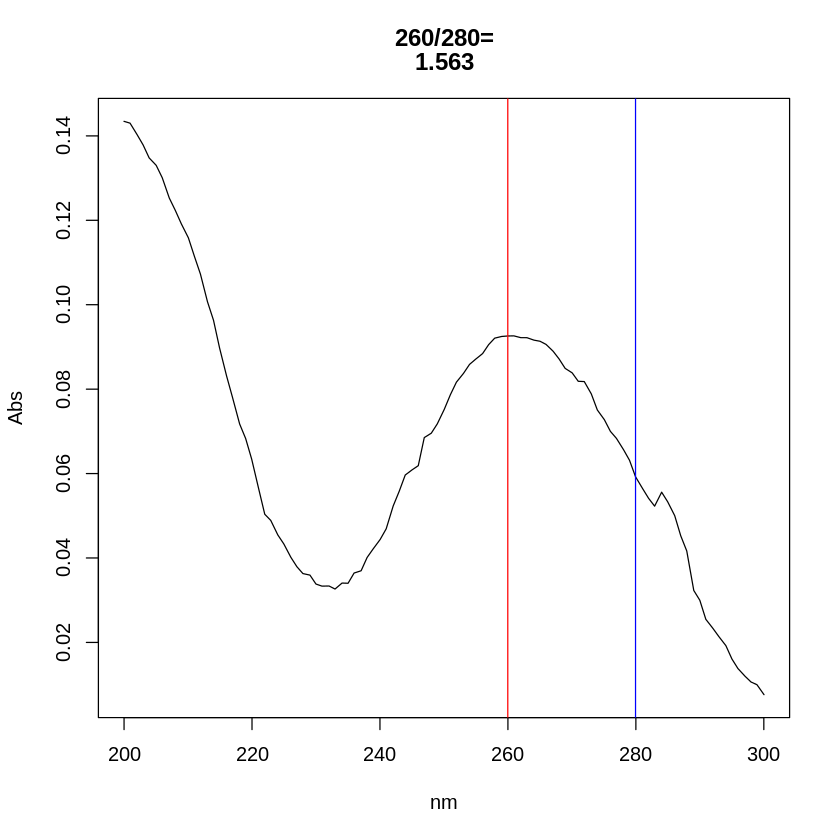

In [25]:
plot(lam,dna$Abs,type='l',xlab='nm',ylab='Abs',main=c('260/280=',signif(r260by280,4)))
abline(v=lam[ik],col=c('red','blue'))

# Inference 


In [26]:
cat(' OD260 =',signif(OD260,3),'\n','OD280 =',signif(OD280,3) ,'\n','OD260/280 ratio =',signif(r260by280,3))
cat('the 260/280 ratio <1.8  and thus DNA stock is pure')

 OD260 = 0.0926 
 OD280 = 0.0592 
 OD260/280 ratio = 1.56the 260/280 ratio <1.8  and thus DNA stock is pure

## QUIZ: 
Explain the term signif(OD260,3)
